In [8]:
%matplotlib inline

import numpy as np
import pickle
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
from sklearn import manifold, cluster
import networkx as nx
import time
import community as cm

In [9]:
# all_embeds = pickle.load(open('hepth/cora_embeds.pkl', 'rb'))
# all_embeds = pickle.load(open('hepth/AS_node2vec.pkl', 'rb'))
# all_embeds = pickle.load(open('hepth/AS_embeds.pkl', 'rb'))
all_embeds = pickle.load(open('hepth/AS_node2vec.pkl', 'rb'))

In [10]:
# nets = [nx.read_graphml('smallworld/time_graphs/0/' + str(2500 + i * 10) + '.graphml') for i in range(10)]
nets = [nx.read_graphml("hepth/graphs/" + str(5*m) + ".graphml") for m in range(10)]

for i in tqdm_notebook(range(len(all_embeds))):
    best = cm.best_partition(nets[i])
    coms = len(set(best.values()))
    print('=================')
    print(cm.modularity(best, nets[i]))
    print('-----------------')
    mods = []
    for j in range(1, coms+1):
        clusters = cluster.KMeans(j).fit_predict(all_embeds[i])
        cluster_dict = dict([(list(nets[i].nodes)[k], clusters[k]) for k in range(len(clusters))])
        mods.append(cm.modularity(cluster_dict, nets[i]))
    print(max(mods))

0.6516334908393504
-----------------
0.49571914049308363
0.6502917864326172
-----------------


C:\Users\jxbox\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:257: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


0.482248512052763
0.6540633633289644
-----------------
0.4804762189198422
0.6542293909551015
-----------------
0.4784121038896021
0.6543706187830132
-----------------
0.48161457696031396
0.6568274730717313
-----------------
0.4873926174822526
0.6442993504009944
-----------------
0.4837589458474932
0.645728440450626
-----------------
0.48282954211824897
0.64326978231115
-----------------
0.48329662111957145
0.6429687100276669
-----------------
0.4783435333711124



0


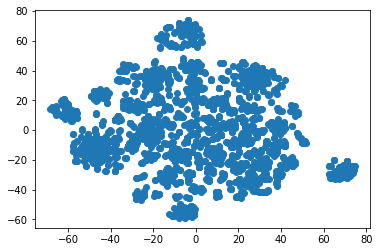

------------------
1


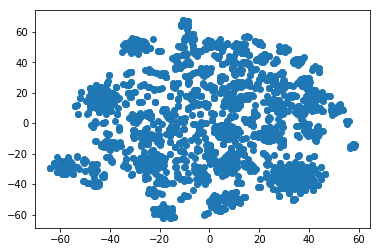

------------------
2


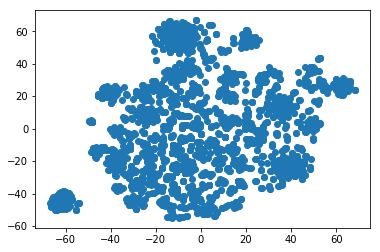

------------------
3


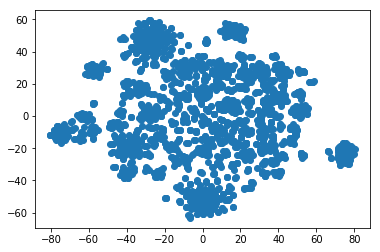

------------------
4


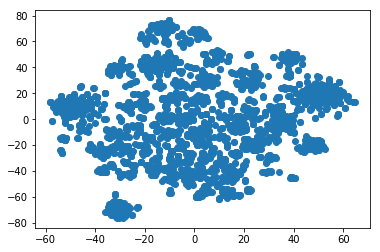

------------------
5


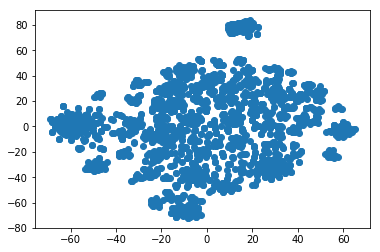

------------------
6


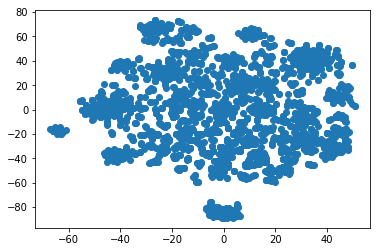

------------------
7


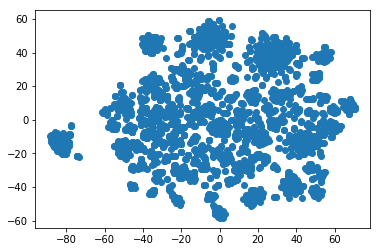

------------------
8


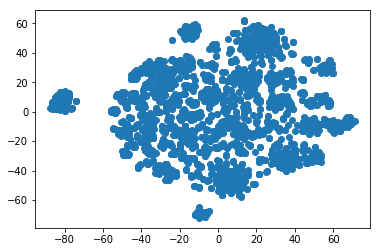

------------------
9


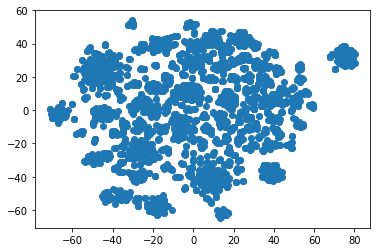

------------------


In [12]:
for i, emb in enumerate(all_embeds):
    embeddings_2 = manifold.TSNE(n_components=2).fit_transform(emb)
#     attrs = [nx.get_node_attributes(nets[i], 'apt_markakis')[j] for j in nets[i].nodes]
#     plt.scatter(embeddings_2[:,0], embeddings_2[:,1], c=attrs)
    
    plt.scatter(embeddings_2[:,0], embeddings_2[:,1])
    print(i)
    plt.show()
    print('------------------')

In [5]:
final = all_embeds[-1].shape[0]
final

1859

In [6]:
for i in range(len(all_embeds)):
#     print(np.zeros((final - embed.shape[0], embed.shape[1])))
    all_embeds[i] = np.vstack((all_embeds[i], np.zeros((final - all_embeds[i].shape[0], all_embeds[i].shape[1]))))
    print(all_embeds[i].shape)

(1859, 16)
(1859, 16)
(1859, 16)
(1859, 16)
(1859, 16)
(1859, 16)
(1859, 16)
(1859, 16)
(1859, 16)
(1859, 16)


In [ ]:
init = 'random'
tsnes = []
 
for embed in tqdm_notebook(all_embeds):
    tsne = manifold.TSNE(n_components=2, random_state=0, init=init)

    init = tsne.fit_transform(embed)

    tsnes.append(init)

# tsnes = pickle.load(open('hepth/AS_tsnes.pkl', 'rb'))

In [6]:
# pickle.dump(tsnes, open('hepth/AS_node2vec_tsnes.pkl', 'wb'))

In [17]:
samples = np.random.choice(tsnes[0].shape[0], 5)

# for idx, tsne in enumerate(tsnes):
#     print(idx)
#     plt.scatter(tsne[samples, 0], tsne[samples, 1])
#     plt.show()

x1 = []
x2 = []
y1 = []
y2 = []

for i in range(len(tsnes) - 1):
    one = tsnes[i]
    two = tsnes[i + 1]

    deltas = two - one
    true_deltas = all_embeds[i+1] - all_embeds[i]
    
    print(str(1285 + i), np.average(np.linalg.norm(true_deltas, ord=2, axis=1)))

    plt.scatter(one[samples, 0], one[samples, 1])
    plt.scatter(two[samples, 0], two[samples, 1])

    # print(one[samples, 0].shape)
    # print(one[samples, 1].shape)
    # print(deltas[samples, 0].shape)
    # print(deltas[samples, 1].shape)

    plt.quiver(one[samples, 0], one[samples, 1], deltas[samples, 0], deltas[samples, 1], 
               units = 'xy', scale_units='xy', angles='xy', scale=1)

    x1.append(plt.xlim()[0])
    x2.append(plt.xlim()[1])
    
    y1.append(plt.ylim()[0])
    y2.append(plt.ylim()[1])
    
    plt.cla()
    plt.clf()

xlim = [min(x1), max(x2)]
ylim = [min(y1), max(y2)]

for i in range(len(tsnes) - 1):
    one = tsnes[i]
    two = tsnes[i + 1]

    deltas = two - one
    true_deltas = all_embeds[i+1] - all_embeds[i]
    
    fig, ax = plt.subplots()
    
    ax.set_title("l2 norm of diff: " + str(np.average(np.linalg.norm(true_deltas, ord=2, axis=1))))
    
    plt.setp(ax, xlim=xlim, ylim=ylim)

    ax.scatter(one[samples, 0], one[samples, 1])
    
    plt.savefig('images/deltas/' + str(i) + '1.png')
    
    ax.quiver(one[samples, 0], one[samples, 1], deltas[samples, 0], deltas[samples, 1], 
               units = 'xy', scale_units='xy', angles='xy', scale=1, label=['a', 'b', 'c', 'd', 'e'])
    
    plt.savefig('images/deltas/' + str(i) + '2.png')
    
    ax.scatter(two[samples, 0], two[samples, 1])
    
    plt.savefig('images/deltas/' + str(i) + '3.png')
    
#     plt.show()
    plt.cla()
    plt.clf()
    plt.close('all')

1285 1.6492258274128655
1286 1.747200604920465
1287 1.777432798634412
1288 1.9033625043844913
1289 2.534214597994373
1290 2.8863658369298437
1291 3.0434037607347326
1292 3.0778876016695498
1293 2.4548668475956483
1294 2.452230686048832
1295 2.374836783765153
1296 2.3228912526669485
1297 2.272053018607836
1298 2.3511387497006635
1299 2.5497139925148096
1300 2.7435873686573786
1301 2.5150157115312384
1302 2.688087654212983
1303 2.757436254248898
1304 2.7170705761657814
1305 2.925919823374621
1306 2.591776278379507
1307 2.8899236591793387
1308 2.832813549051927


In [18]:
t1 = all_embeds[i+1] - all_embeds[i]
np.linalg.norm(t1, 'fro')

235.45690763706398